# Development of a predictive model

Import libraries needed to develop the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 

# Load and check data

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/daoudecho/Forest-Cover-IBM/master/eee.csv')

##### Explore Data Dimension

In [13]:
print('Data Dimension:')
print('Number of Records:', data.shape[0])
print('Number of Features:', data.shape[1])

Data Dimension:
Number of Records: 581012
Number of Features: 55


In [14]:
#Names of columns
print('Feature Names')
print(data.columns)

Feature Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39'

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [29]:
#Let's check for missing values 
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


 Data distribution for each feature

In [32]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
# grouping by forest cover type and calculating 
data.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

###### We have uneven samples of forest cover type, where 1,2 has the highest no. of observation of all. Only these 2 cover types add up to 495,141 number of observations out of 581,011 total which covers approx 85.2% of data.

Feature Visualization

###### Exploring Skewness of each features:

In [36]:
# skew distribution
data.skew()

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

##### We can see that Soil_Type15 has the highest positive skewness meaning the mass of the distribution is concentrated to the left and has long tail to the right followed by Soil_Type7 , 36, 38. This is also called right skewed distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

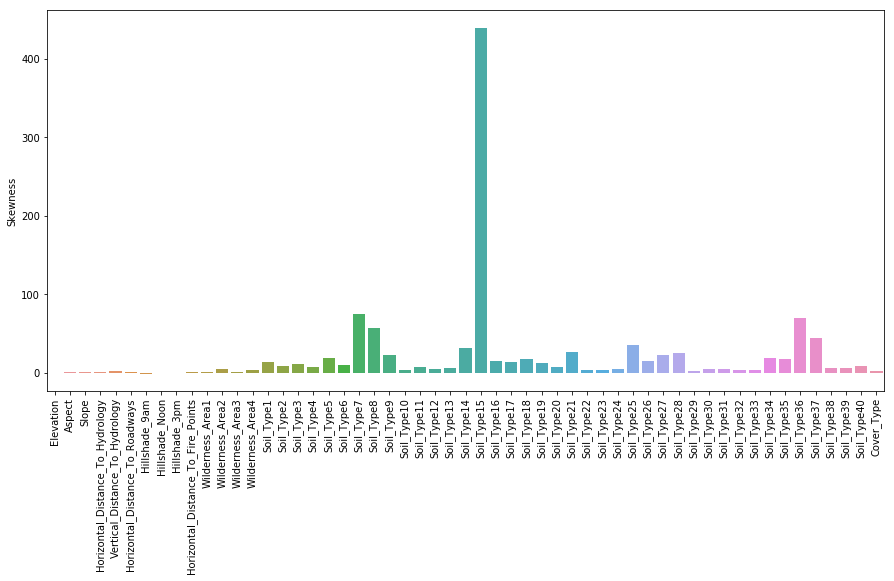

In [51]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

##### about the class balance

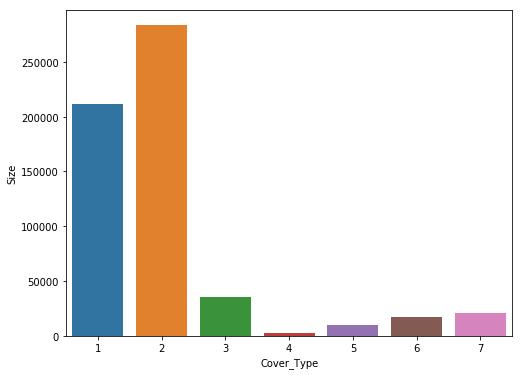

In [50]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

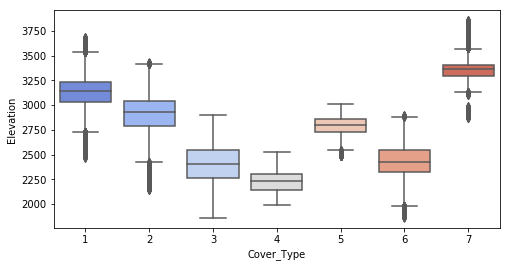

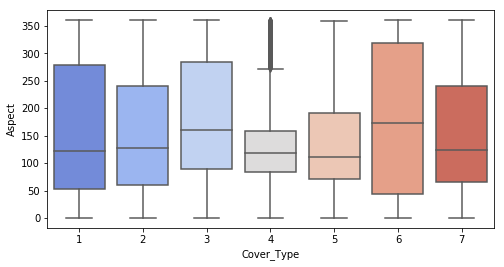

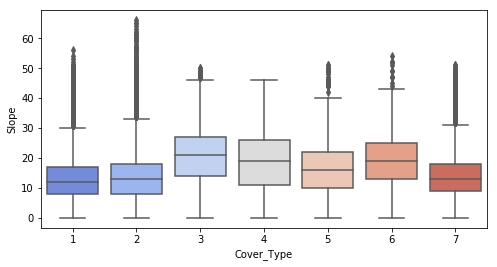

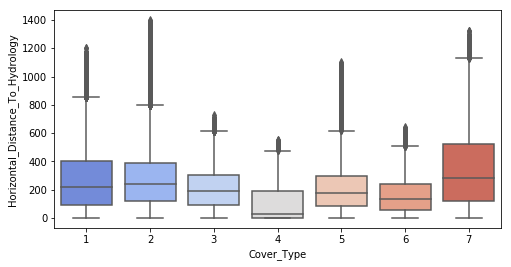

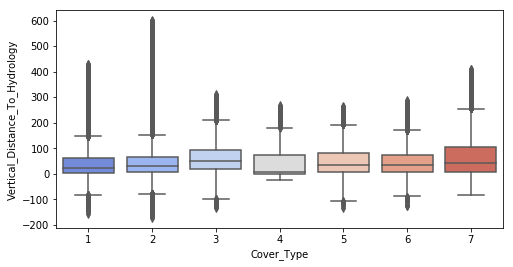

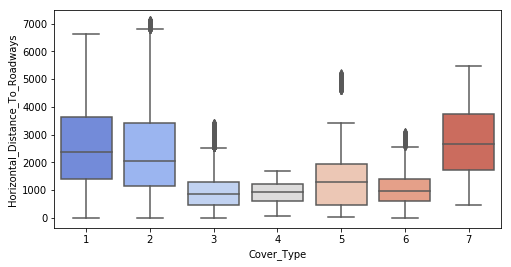

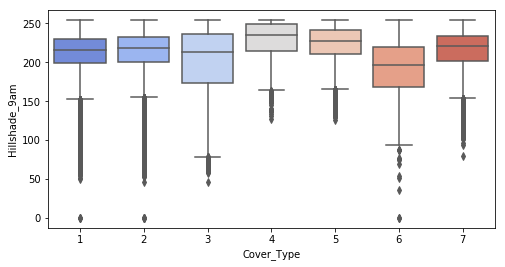

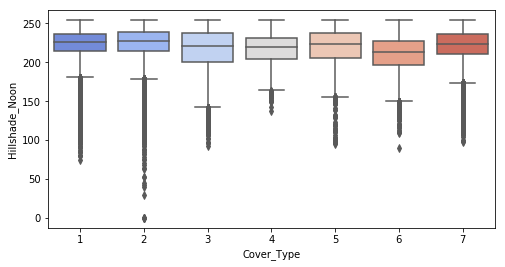

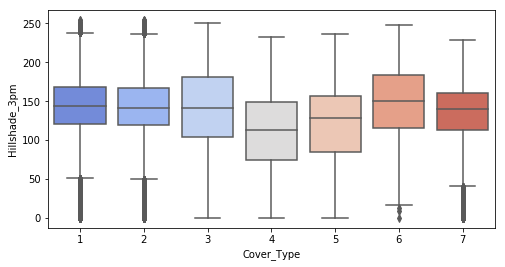

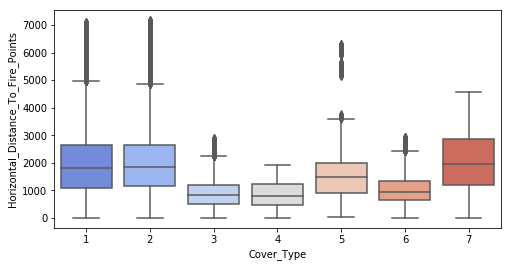

In [59]:
# %%time
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
data['Cover_Type']=data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data, palette="coolwarm")

CPU times: user 34.3 s, sys: 96 ms, total: 34.4 s
Wall time: 33.4 s


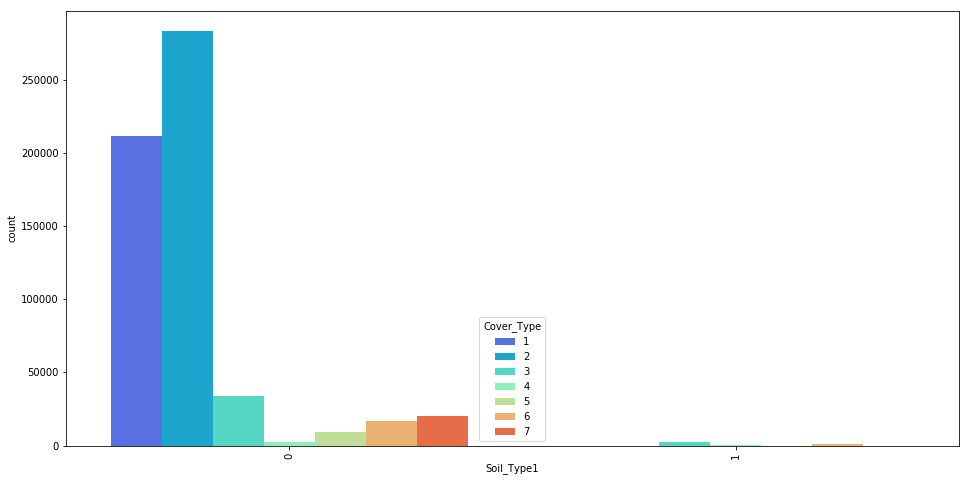

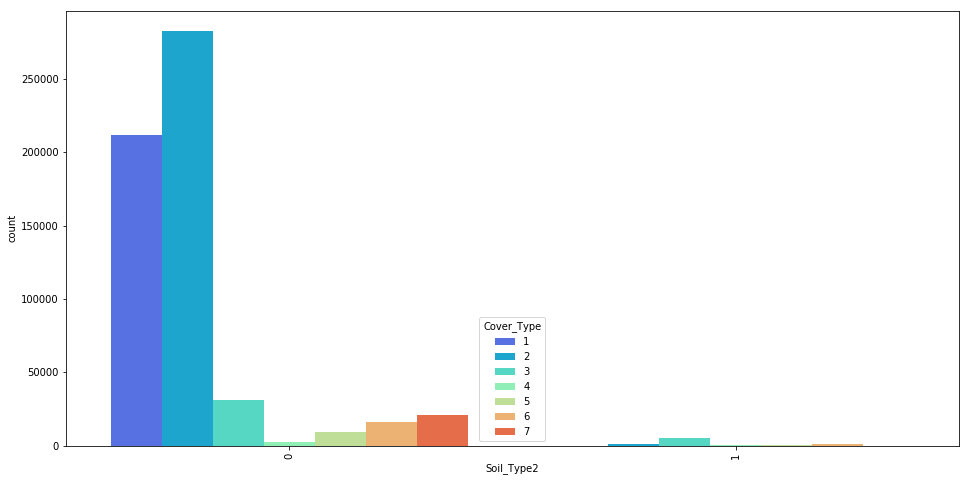

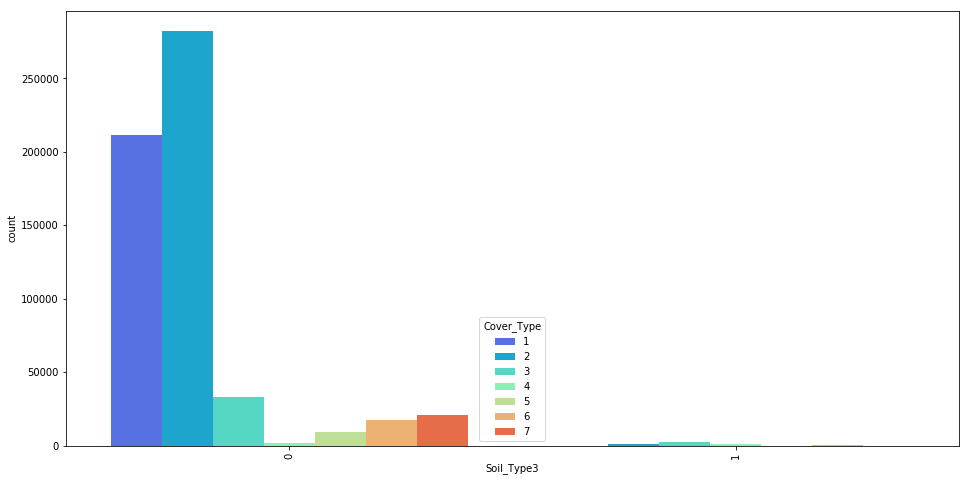

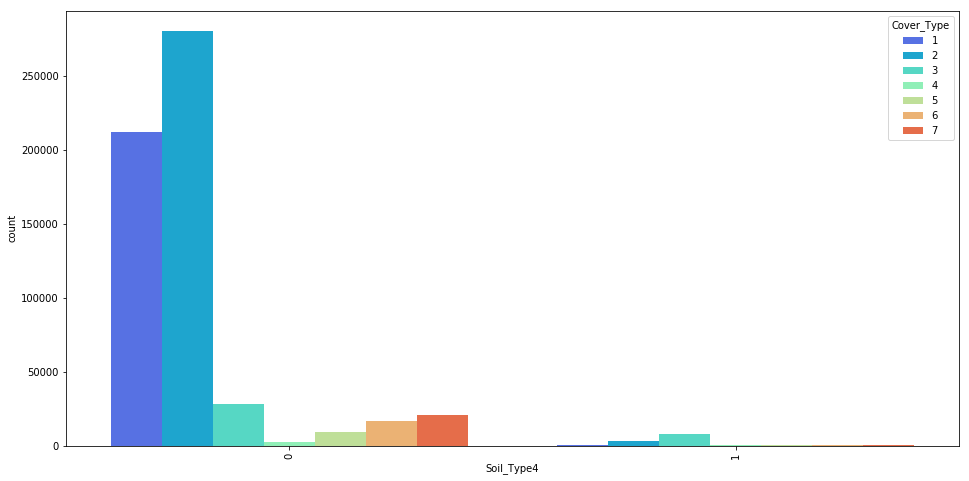

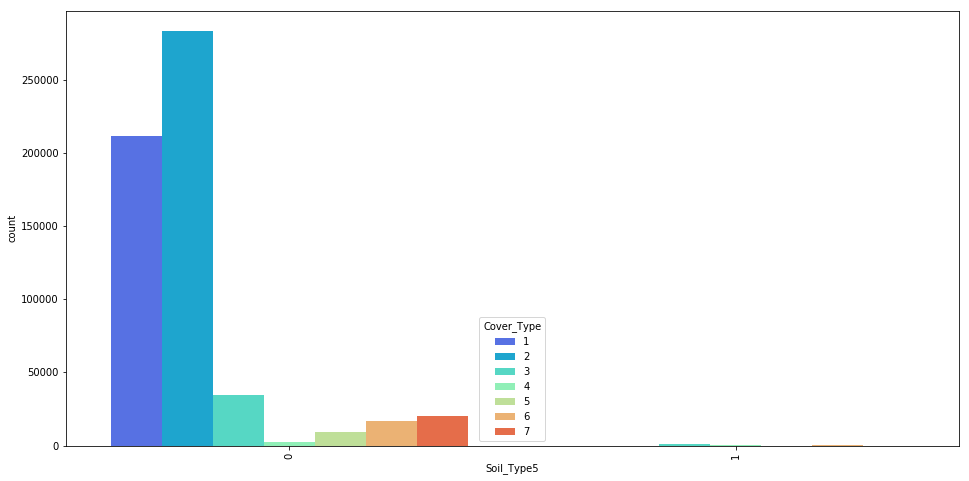

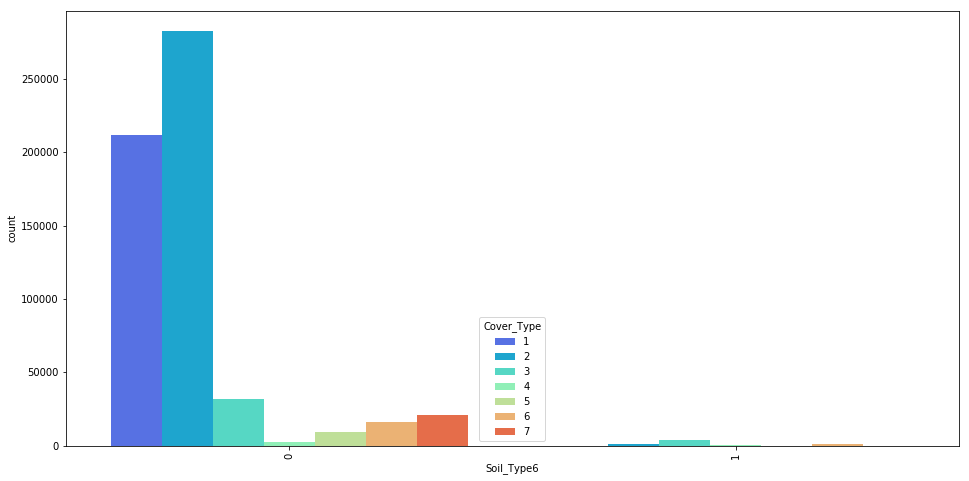

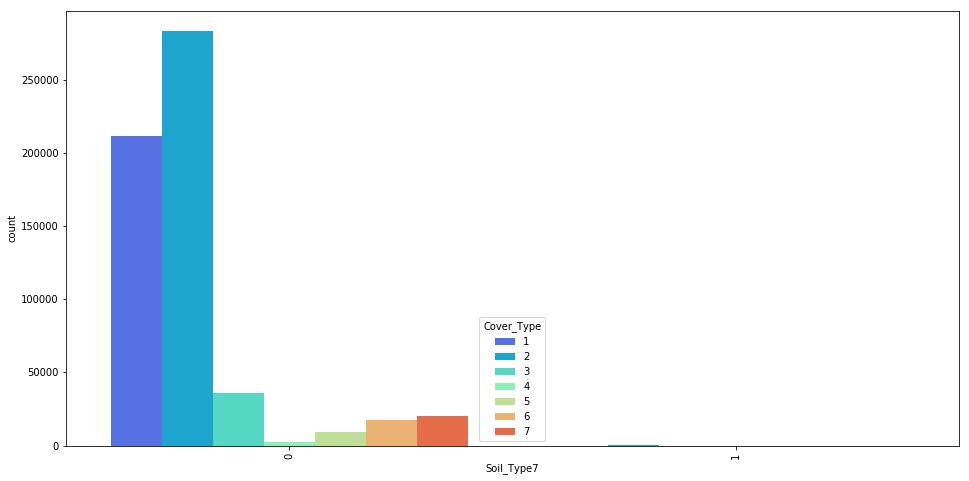

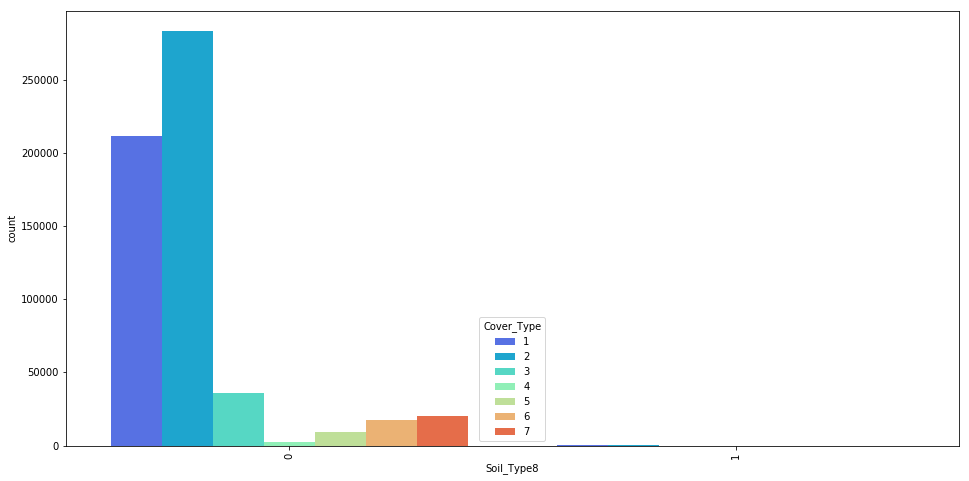

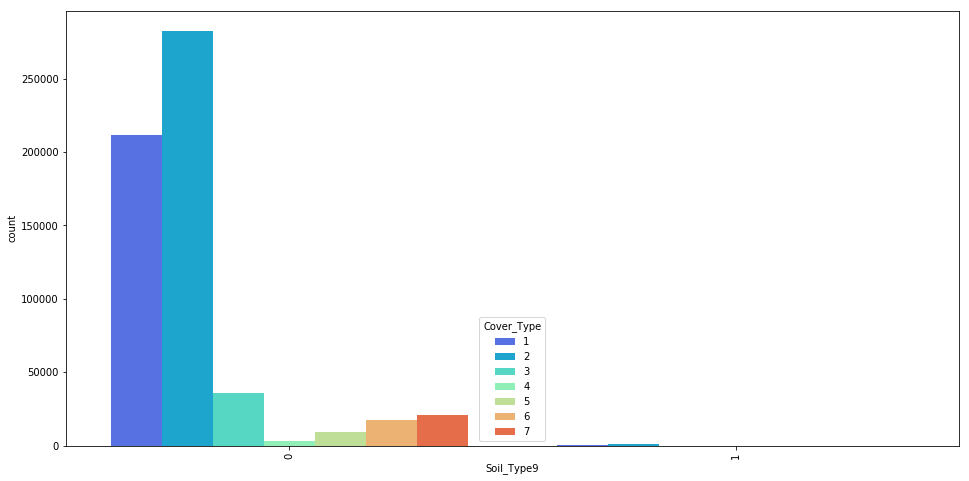

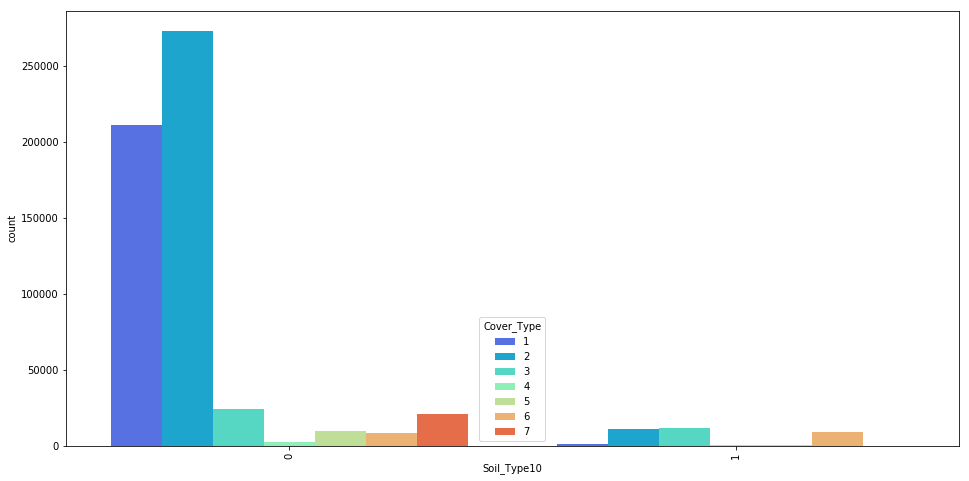

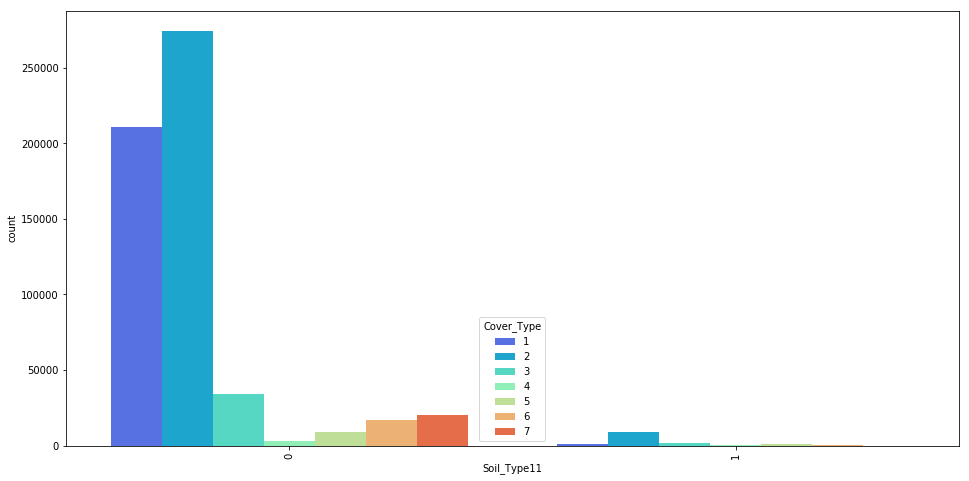

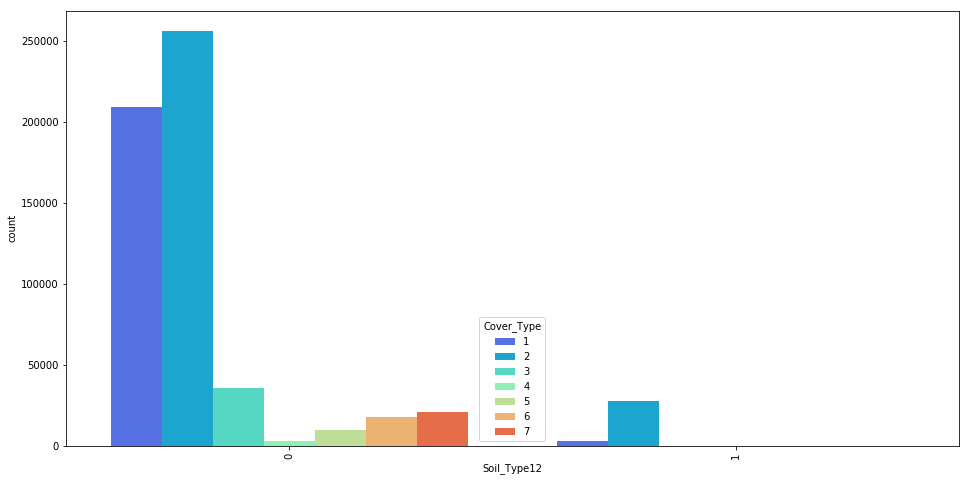

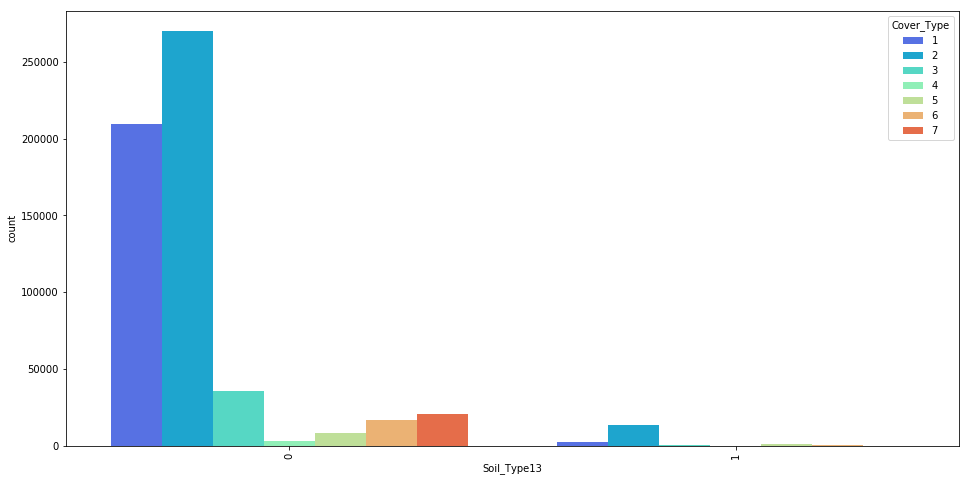

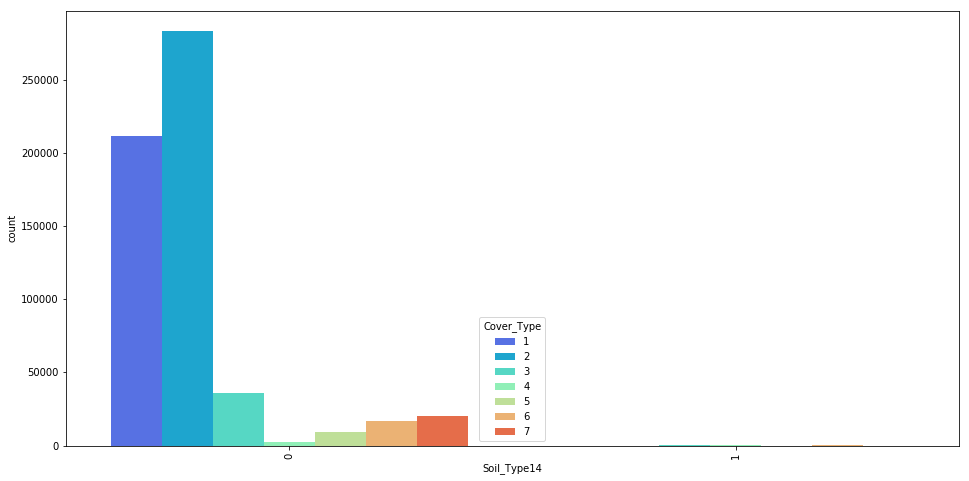

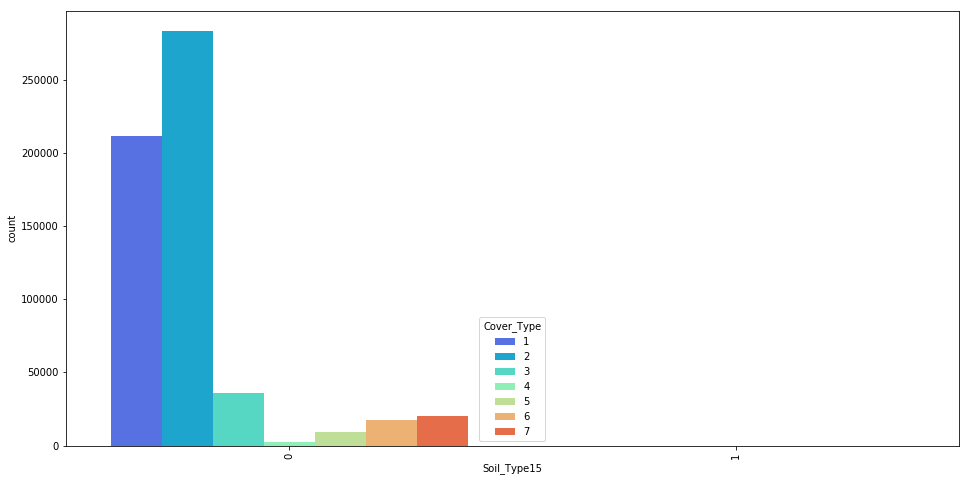

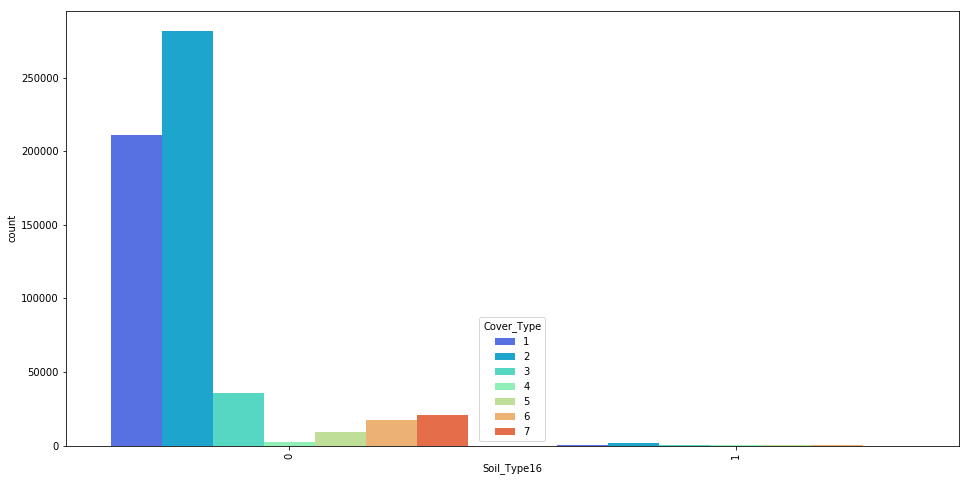

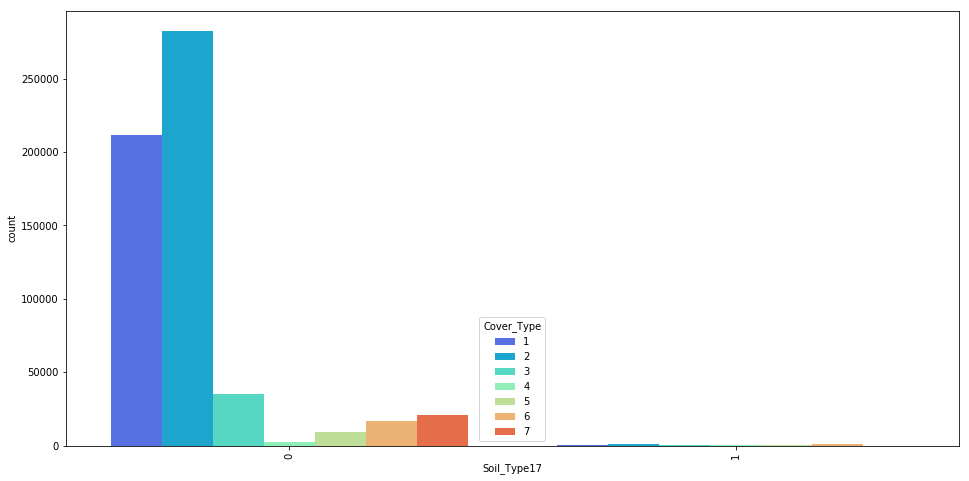

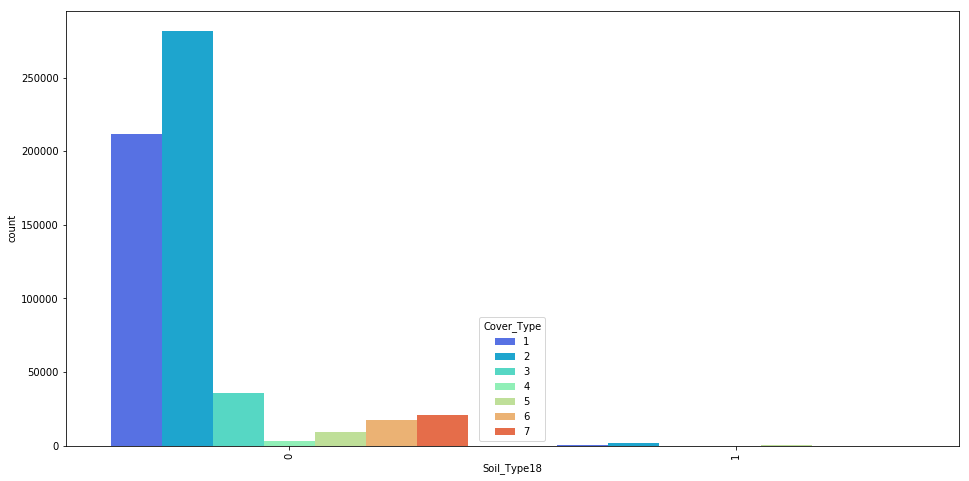

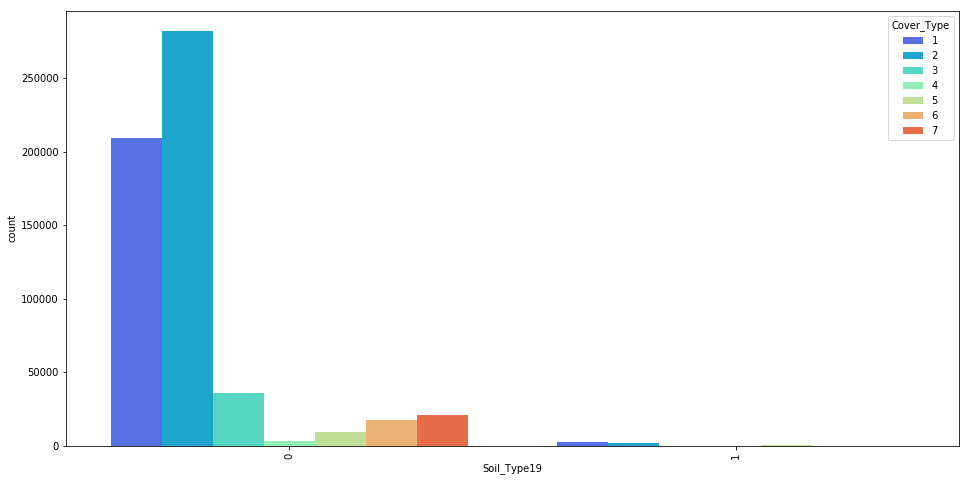

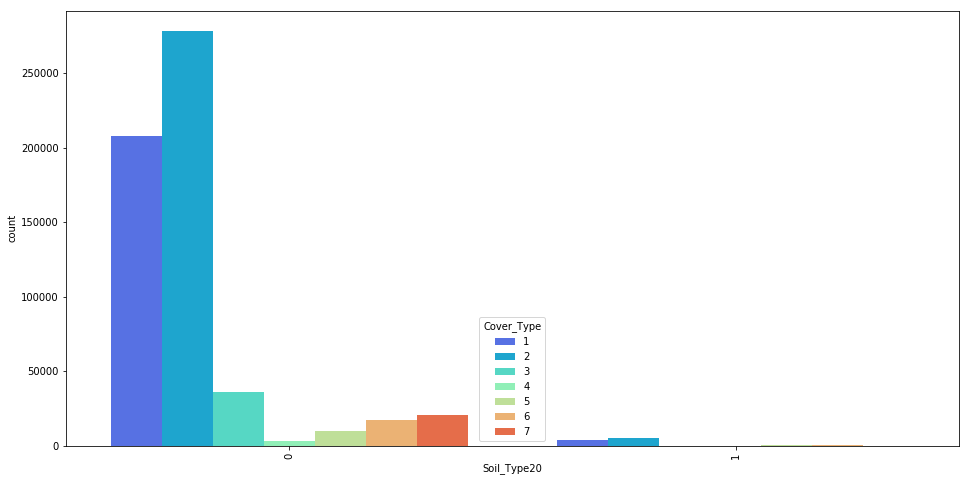

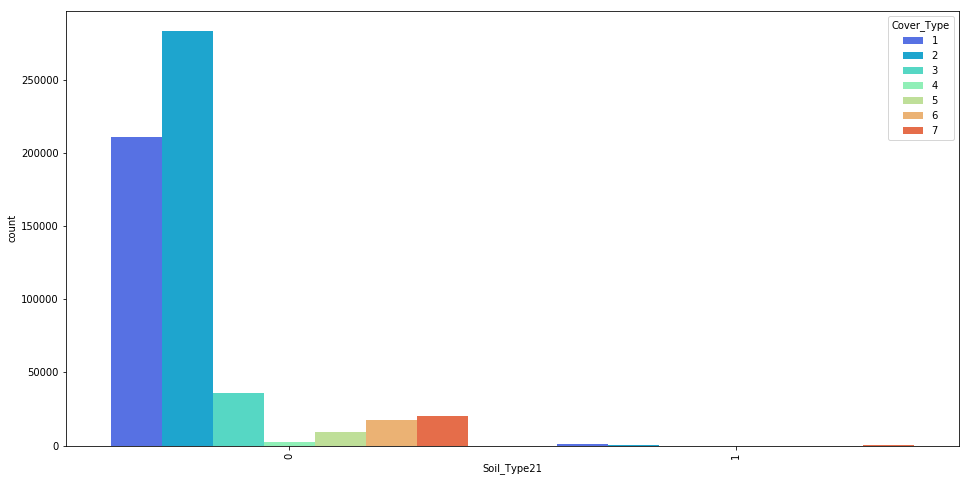

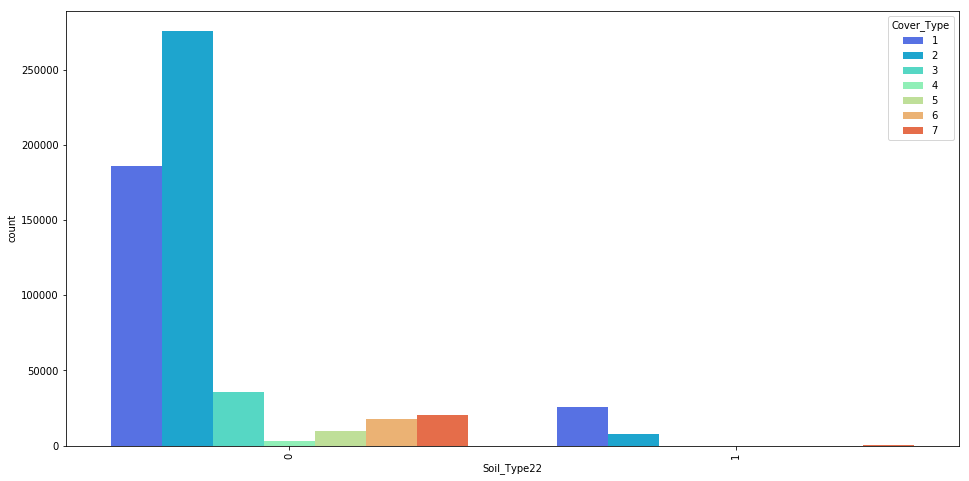

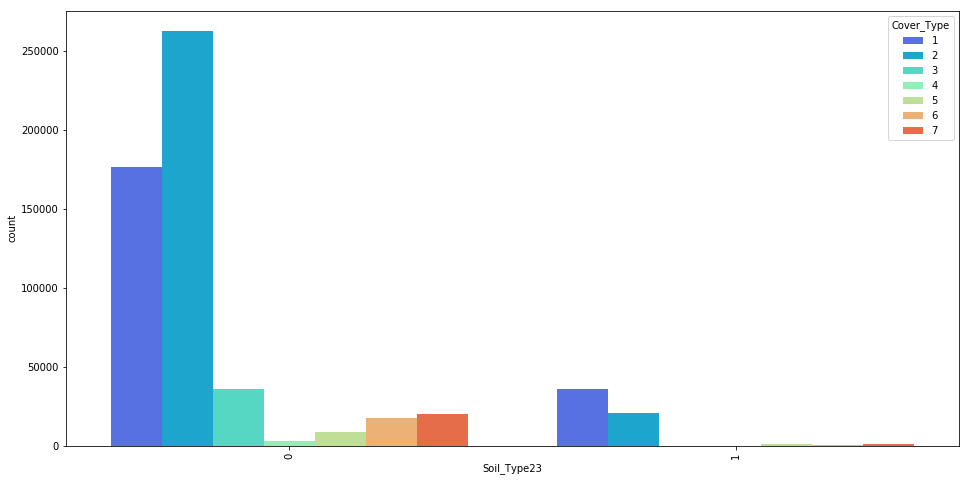

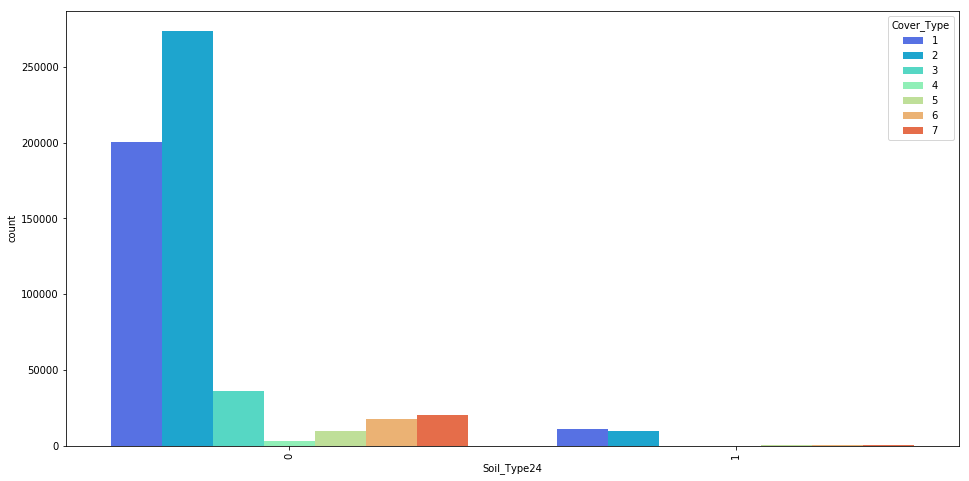

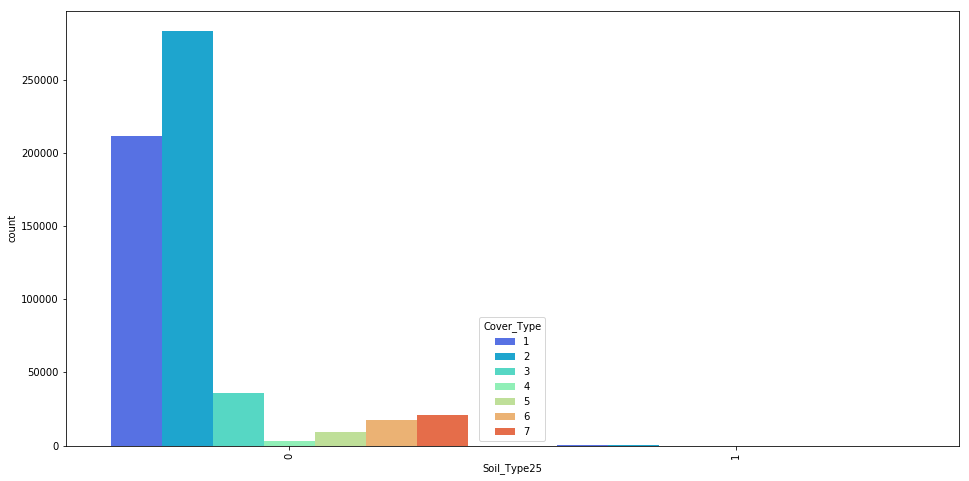

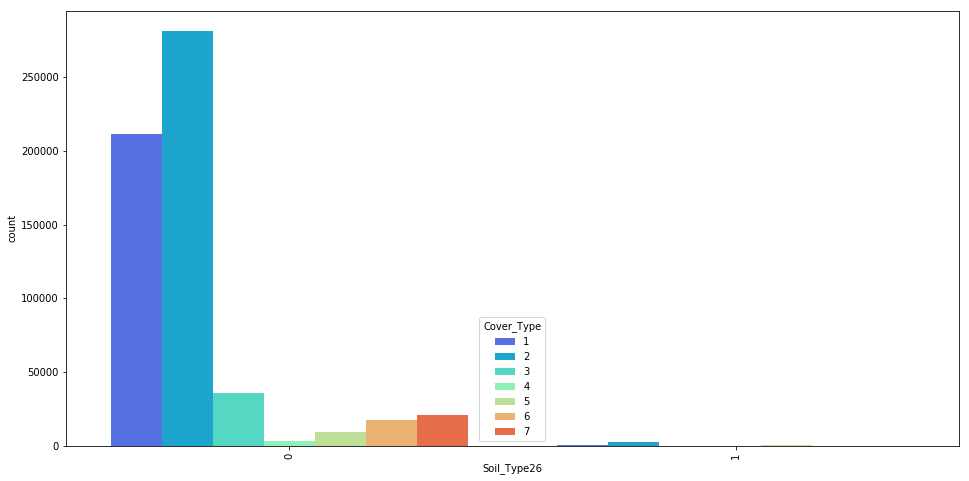

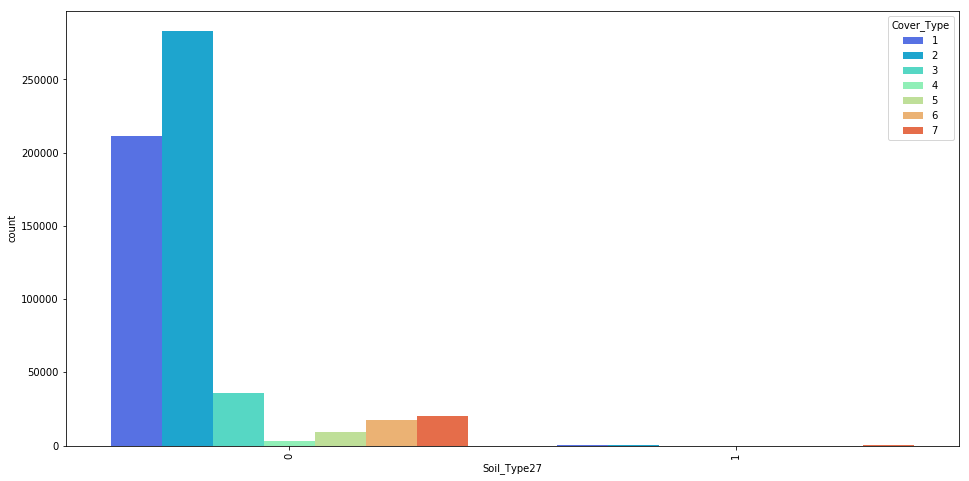

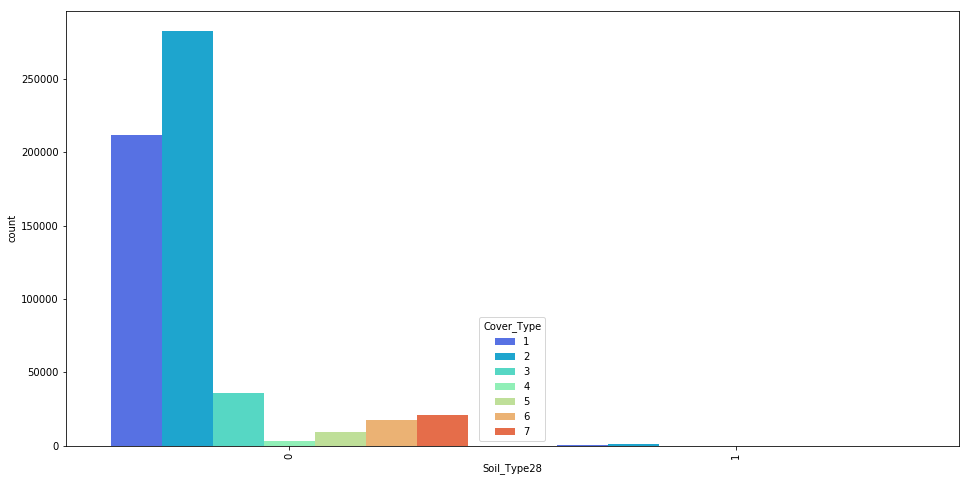

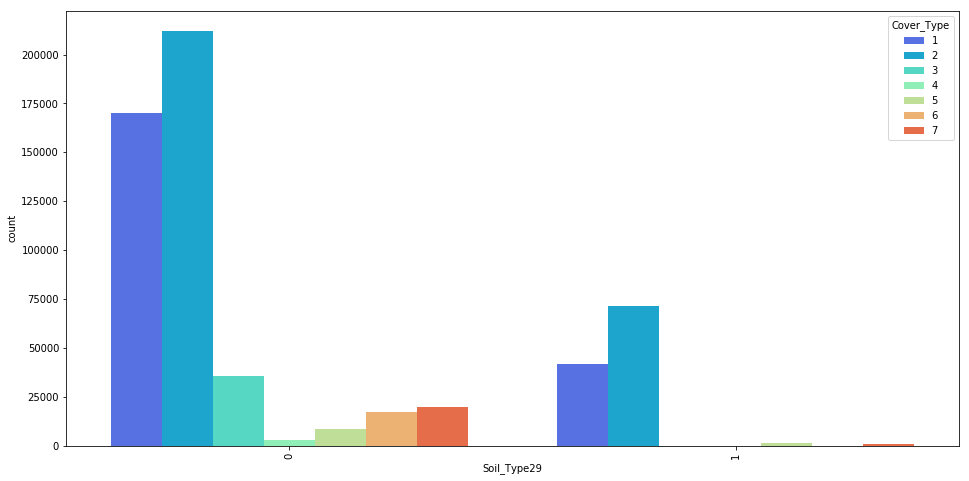

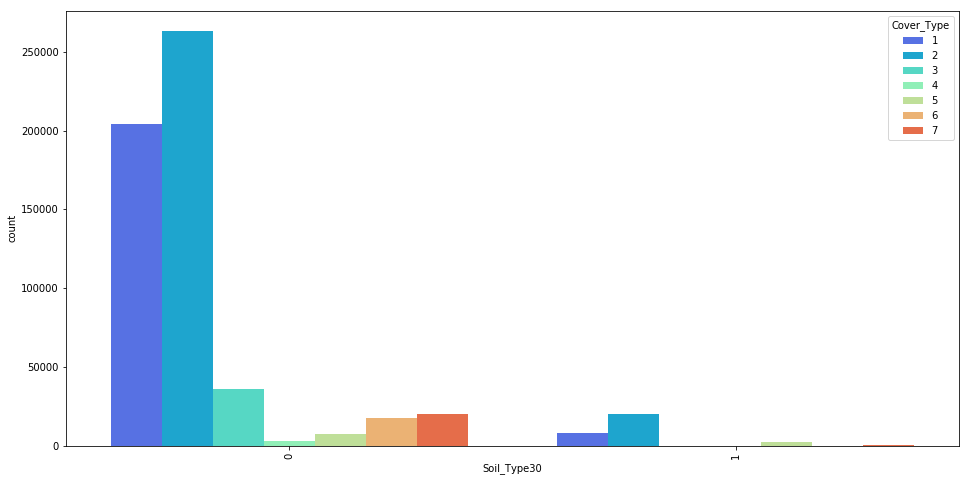

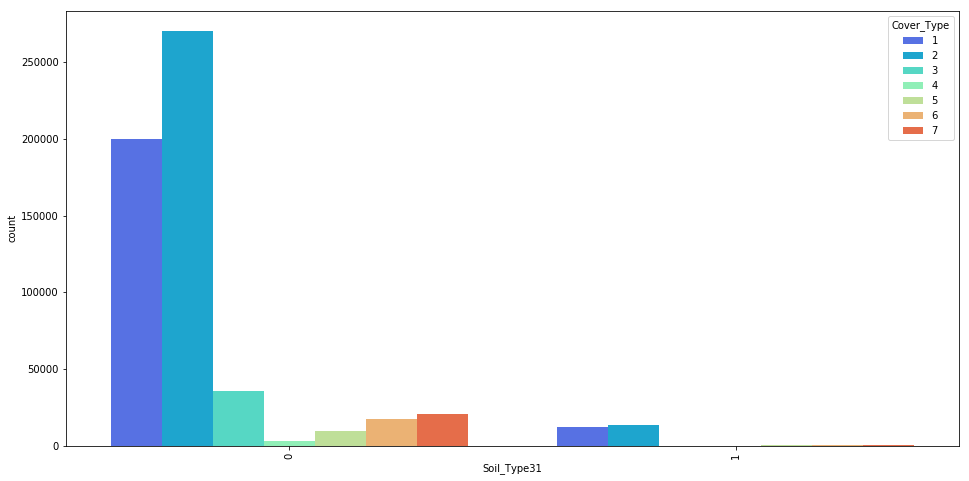

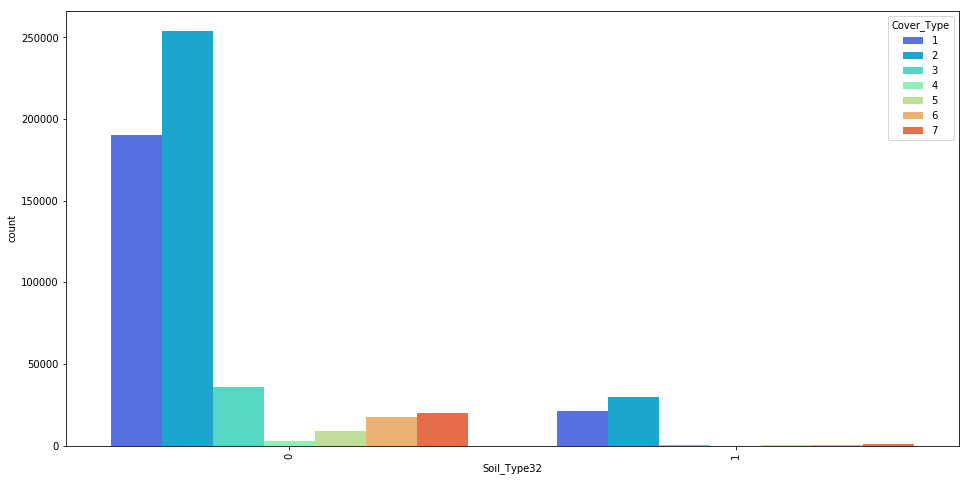

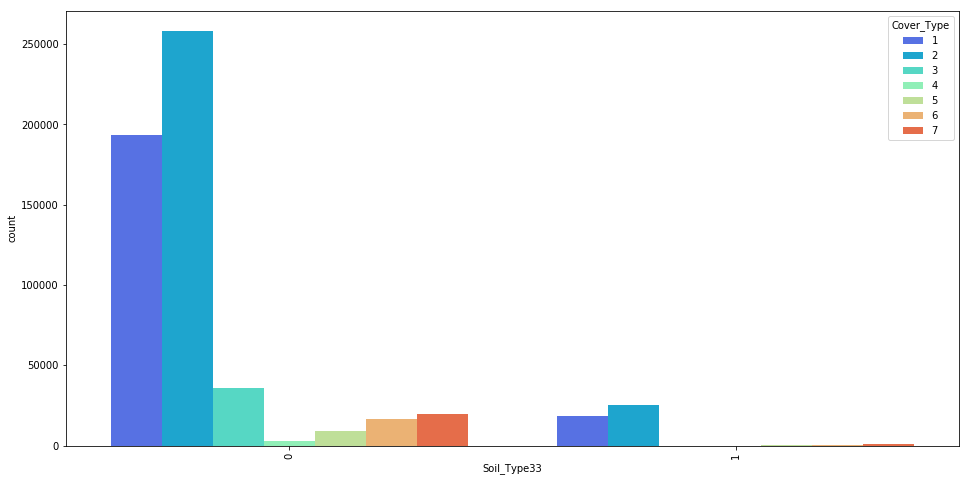

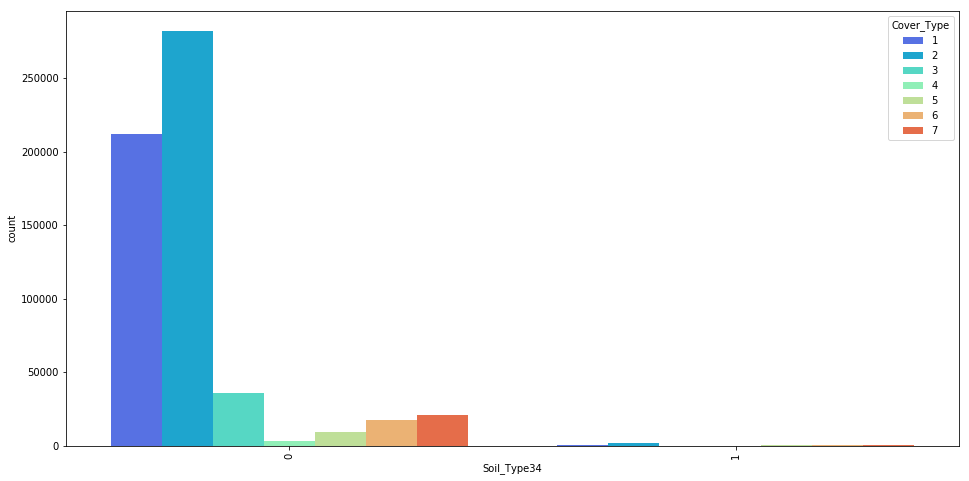

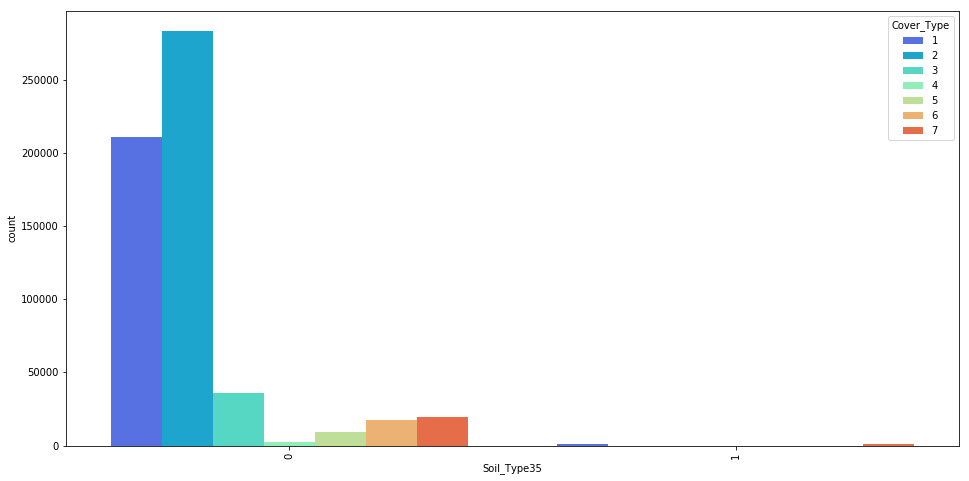

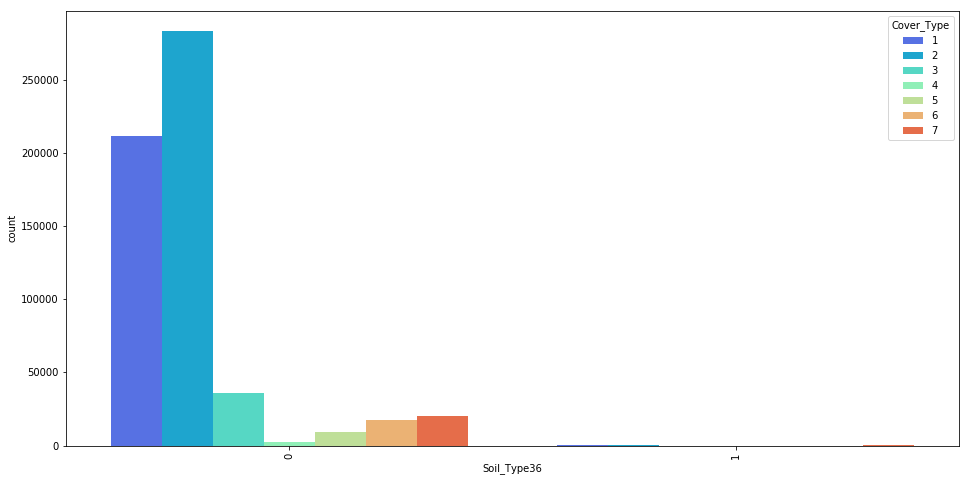

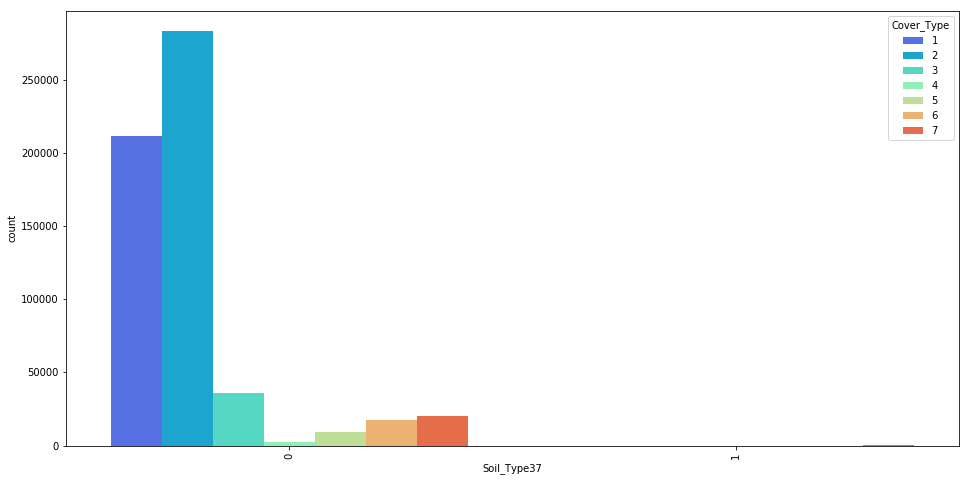

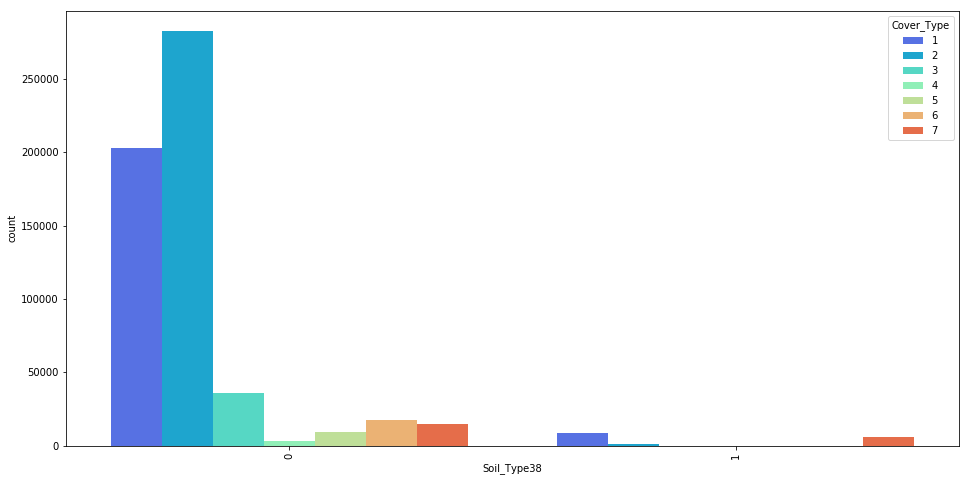

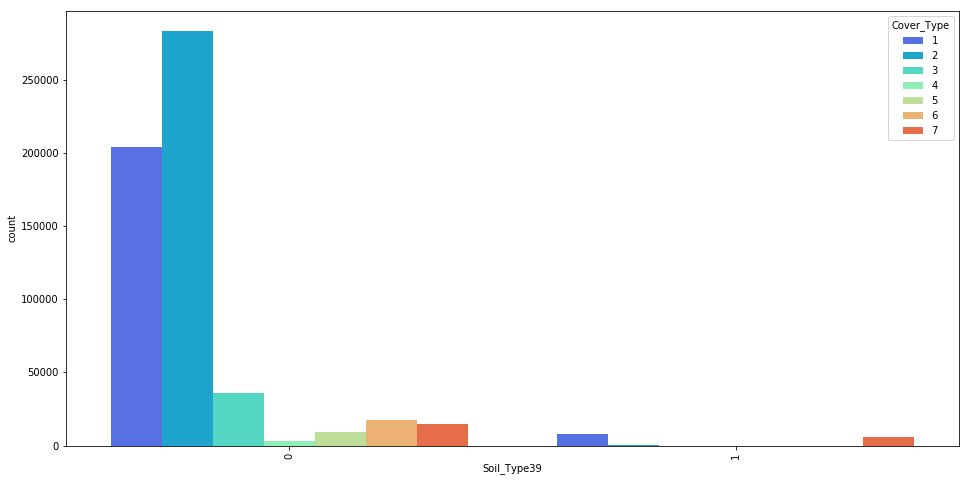

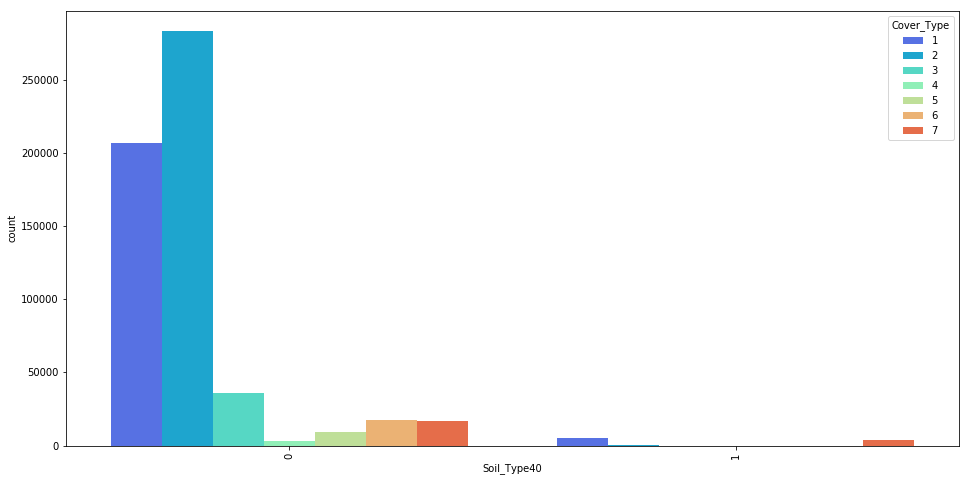

In [84]:
%%time
Soil_Type=data.loc[:,'Soil_Type1':'Soil_Type40']
for i in Soil_Type :
    plt.figure(figsize=(16,8))
    sns.countplot(x=Soil_Type[i], hue='Cover_Type',data=data, palette="rainbow")
    plt.xticks(rotation=90)

In [96]:
%%time
Soil_Type=data.loc[:,'Soil_Type1':'Soil_Type40']
def rev_code(row):
    for c in Soil_Type.columns:
        if row[c]==1:
            return c  

data['Soil_Type']=Soil_Type.apply(rev_code, axis=1)

CPU times: user 2min 28s, sys: 512 ms, total: 2min 28s
Wall time: 2min 34s


CPU times: user 780 ms, sys: 4 ms, total: 784 ms
Wall time: 803 ms


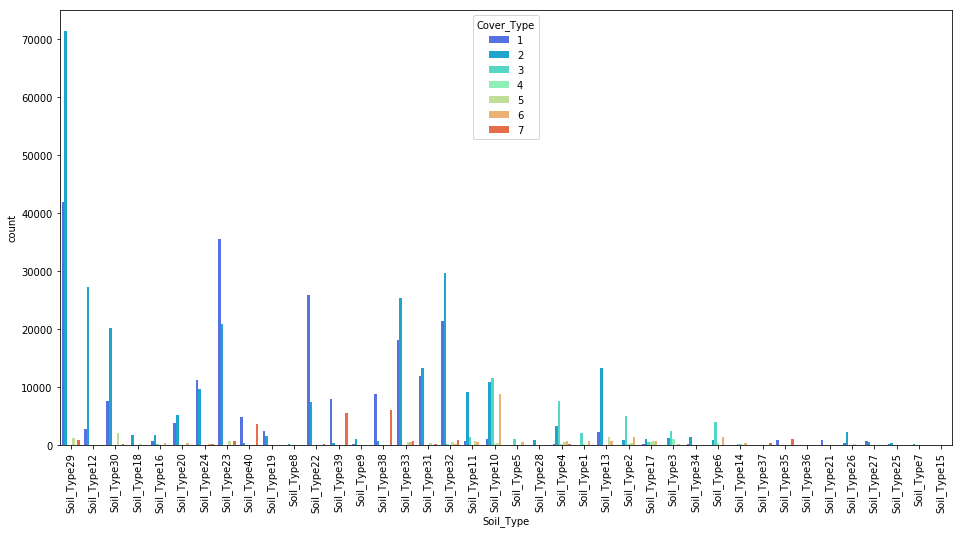

In [97]:
%%time
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=data, palette="rainbow")
plt.xticks(rotation=90)

In [100]:
%%time
Wilderness_Type=data.loc[:,'Wilderness_Area1':'Wilderness_Area4']
def rev_code(row):
    for c in Wilderness_Type.columns:
        if row[c]==1:
            return c  

data['Wilderness_Type']=Wilderness_Type.apply(rev_code, axis=1)

CPU times: user 24 s, sys: 40 ms, total: 24.1 s
Wall time: 24.7 s


CPU times: user 260 ms, sys: 0 ns, total: 260 ms
Wall time: 281 ms


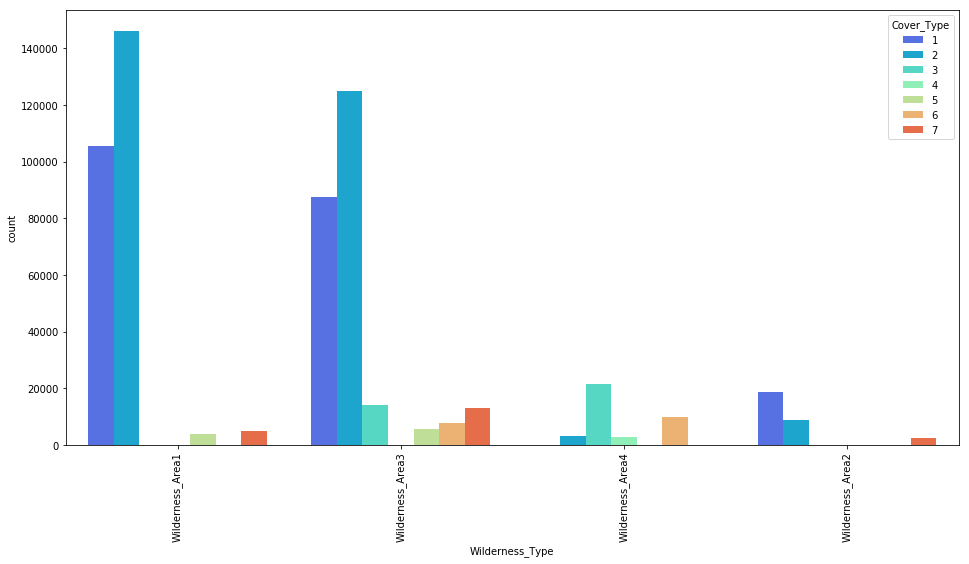

In [101]:
%%time
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=data, palette="rainbow")
plt.xticks(rotation=90)

# Data Modelling

#X = Input 

#y= Target variable ('Cover_Type')

In [3]:
X=data.loc[:,'Elevation':'Soil_Type40']
Y=data['Cover_Type']

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


In [5]:
#Splitting the data into  train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)
print('data split:')
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

data split:


((406708, 54), (174304, 54), (406708,), (174304,))

# MODEL

# Decision Tree

In [6]:
%time 
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
model.feature_importances_ 
print(model.score(X_test, Y_test)) # 1.0
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.2 µs
0.9351879474940334
0.9351879474940334
[[59154  3871     4     0    50     9   311]
 [ 3647 80494   235     2   397   170    48]
 [    4   206 10067    94    29   422     0]
 [    0     2    98   680     0    49     0]
 [   68   446    30     0  2312    13     1]
 [   10   188   482    36    13  4520     0]
 [  320    42     0     0     0     0  5780]]
              precision    recall  f1-score   support

           1       0.94      0.93      0.93     63399
           2       0.94      0.95      0.95     84993
           3       0.92      0.93      0.93     10822
           4       0.84      0.82      0.83       829
           5       0.83      0.81      0.82      2870
           6       0.87      0.86      0.87      5249
           7       0.94      0.94      0.94      6142

   micro avg       0.94      0.94      0.94    174304
   macro avg       0.90      0.89      0.89    174304
weighted avg       0.94      0.94      0

In [7]:
accuracy_score(Y_test, Y_pred)

0.9351879474940334

In [8]:
confusion_matrix(Y_test, Y_pred)

array([[59154,  3871,     4,     0,    50,     9,   311],
       [ 3647, 80494,   235,     2,   397,   170,    48],
       [    4,   206, 10067,    94,    29,   422,     0],
       [    0,     2,    98,   680,     0,    49,     0],
       [   68,   446,    30,     0,  2312,    13,     1],
       [   10,   188,   482,    36,    13,  4520,     0],
       [  320,    42,     0,     0,     0,     0,  5780]])

In [9]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.94      0.93      0.93     63399
           2       0.94      0.95      0.95     84993
           3       0.92      0.93      0.93     10822
           4       0.84      0.82      0.83       829
           5       0.83      0.81      0.82      2870
           6       0.87      0.86      0.87      5249
           7       0.94      0.94      0.94      6142

   micro avg       0.94      0.94      0.94    174304
   macro avg       0.90      0.89      0.89    174304
weighted avg       0.94      0.94      0.94    174304



# Random Forest

In [ ]:
%time 
model = RandomForestClassifier(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25)
model.fit(X_train, Y_train) 
print(model.score(X_test, Y_test)) 
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [25]:
accuracy_score(Y_test, Y_pred)

0.9536327336148338

In [26]:
confusion_matrix(Y_test, Y_pred)

array([[59764,  3457,     2,     0,    15,     9,   152],
       [ 1873, 82719,   167,     5,   119,    94,    16],
       [    0,   163, 10406,    45,     7,   201,     0],
       [    0,     0,    91,   703,     0,    35,     0],
       [   37,   632,    39,     0,  2152,    10,     0],
       [    9,   162,   385,    15,     3,  4675,     0],
       [  298,    41,     0,     0,     0,     0,  5803]])

In [27]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63399
           2       0.95      0.97      0.96     84993
           3       0.94      0.96      0.95     10822
           4       0.92      0.85      0.88       829
           5       0.94      0.75      0.83      2870
           6       0.93      0.89      0.91      5249
           7       0.97      0.94      0.96      6142

   micro avg       0.95      0.95      0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



# Logistic Regresion

In [8]:
%time 
model = LogisticRegression()
model.fit(X_train, Y_train)
#model.feature_importances_ 
print(model.score(X_test, Y_test)) 
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7118081053791078
0.7118081053791078
[[43437 18683    48     0     0     0  1231]
 [15225 67611  1942     7     0   108   100]
 [    7  1139  9297   109     0   269     1]
 [    0     0   524   217     0    88     0]
 [   67  2535   267     0     0     0     1]
 [    5  1949  2978    18     0   299     0]
 [ 2857    48    27     0     0     0  3210]]
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     63399
           2       0.74      0.80      0.76     84993
           3       0.62      0.86      0.72     10822
           4       0.62      0.26      0.37       829
           5       0.00      0.00      0.00      2870
           6       0.39      0.06      0.10      5249
           7       0.71      0.52      0.60      6142

   micro avg       0.71      0.71      0.71    174304
   macro avg       0.54      0.45      0.46    174304
weighted avg       0.69      0.71      0.70    174304



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
accuracy_score(Y_test, Y_pred)

0.7118081053791078

In [10]:
confusion_matrix(Y_test, Y_pred)

array([[43437, 18683,    48,     0,     0,     0,  1231],
       [15225, 67611,  1942,     7,     0,   108,   100],
       [    7,  1139,  9297,   109,     0,   269,     1],
       [    0,     0,   524,   217,     0,    88,     0],
       [   67,  2535,   267,     0,     0,     0,     1],
       [    5,  1949,  2978,    18,     0,   299,     0],
       [ 2857,    48,    27,     0,     0,     0,  3210]])

In [11]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.71      0.69      0.70     63399
           2       0.74      0.80      0.76     84993
           3       0.62      0.86      0.72     10822
           4       0.62      0.26      0.37       829
           5       0.00      0.00      0.00      2870
           6       0.39      0.06      0.10      5249
           7       0.71      0.52      0.60      6142

   micro avg       0.71      0.71      0.71    174304
   macro avg       0.54      0.45      0.46    174304
weighted avg       0.69      0.71      0.70    174304



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# XGBoost

In [28]:
%time 
model = xgb.XGBClassifier(n_estimators=100, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=0)
model.fit(X_train, Y_train) 
print(model.score(X_test, Y_test)) # 1.0
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.7 µs
0.7861724343675418
0.7861724343675418
[[48306 14508     5     0    13     8   559]
 [12347 71566   599     6    88   370    17]
 [    0   964  9313    86     0   459     0]
 [    0     0   153   652     0    24     0]
 [    9  2136    63     0   659     3     0]
 [    1  1109  2099    19     0  2021     0]
 [ 1608    18     0     0     0     0  4516]]
              precision    recall  f1-score   support

           1       0.78      0.76      0.77     63399
           2       0.79      0.84      0.82     84993
           3       0.76      0.86      0.81     10822
           4       0.85      0.79      0.82       829
           5       0.87      0.23      0.36      2870
           6       0.70      0.39      0.50      5249
           7       0.89      0.74      0.80      6142

   micro avg       0.79      0.79      0.79    174304
   macro avg       0.81      0.66      0.70    174304
weighted avg       0.79      0.79      0

In [29]:
accuracy_score(Y_test, Y_pred)

0.7861724343675418

In [30]:
confusion_matrix(Y_test, Y_pred)

array([[48306, 14508,     5,     0,    13,     8,   559],
       [12347, 71566,   599,     6,    88,   370,    17],
       [    0,   964,  9313,    86,     0,   459,     0],
       [    0,     0,   153,   652,     0,    24,     0],
       [    9,  2136,    63,     0,   659,     3,     0],
       [    1,  1109,  2099,    19,     0,  2021,     0],
       [ 1608,    18,     0,     0,     0,     0,  4516]])

In [31]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.78      0.76      0.77     63399
           2       0.79      0.84      0.82     84993
           3       0.76      0.86      0.81     10822
           4       0.85      0.79      0.82       829
           5       0.87      0.23      0.36      2870
           6       0.70      0.39      0.50      5249
           7       0.89      0.74      0.80      6142

   micro avg       0.79      0.79      0.79    174304
   macro avg       0.81      0.66      0.70    174304
weighted avg       0.79      0.79      0.78    174304



# KNeighborsClassifier

In [33]:
%%time
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

CPU times: user 8min 22s, sys: 1.5 s, total: 8min 24s
Wall time: 8min 35s


In [34]:
accuracy_score(Y_test, Y_pred)

0.7861724343675418

In [35]:
confusion_matrix(Y_test, Y_pred)

array([[48306, 14508,     5,     0,    13,     8,   559],
       [12347, 71566,   599,     6,    88,   370,    17],
       [    0,   964,  9313,    86,     0,   459,     0],
       [    0,     0,   153,   652,     0,    24,     0],
       [    9,  2136,    63,     0,   659,     3,     0],
       [    1,  1109,  2099,    19,     0,  2021,     0],
       [ 1608,    18,     0,     0,     0,     0,  4516]])

In [36]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.78      0.76      0.77     63399
           2       0.79      0.84      0.82     84993
           3       0.76      0.86      0.81     10822
           4       0.85      0.79      0.82       829
           5       0.87      0.23      0.36      2870
           6       0.70      0.39      0.50      5249
           7       0.89      0.74      0.80      6142

   micro avg       0.79      0.79      0.79    174304
   macro avg       0.81      0.66      0.70    174304
weighted avg       0.79      0.79      0.78    174304

